(2000, 2)
(2000, 1)


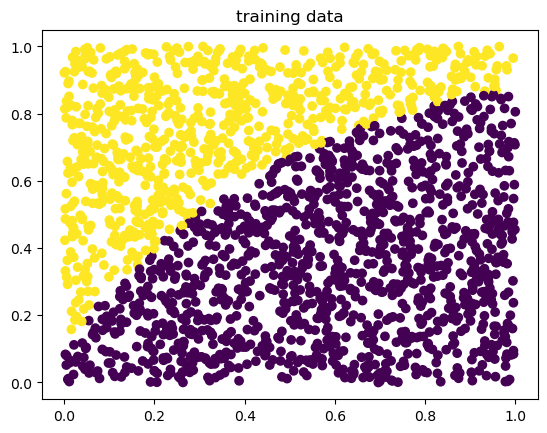

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle

pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)
print(x_train.shape)
print(y_train.shape)

# for idx in range(2000):
#     print(x_train[idx], y_train[idx])

n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')
plt.show()

#### 2a) For a binary linear classiﬁer, explain (mathematically) why the logistic loss function does not suﬀer from the same problem as the squared error loss on easy to classify point.
Unlike squared error loss, the logistic loss function uses a logarithmic scale to reduce penalties as predictions near the actual label, preventing disproportionate penalties for well-classified points.

#### 2b) Compute an expression for the gradient (with respect to w) of the ℓ2 regularized logistic loss.
∇L(w)= ∑{i=1}^n -yixi.T/(1+e**(yixi.T*w)) + 2λw

#### 2c) Use the expression for the gradient that you derived to implement gradient descent and train a classiﬁer on the provided dataset. For simplicity, you may assume λ = 1.

In [2]:
def logistic_graddescent(X, y, tau, w_init, it, lambda_val=1):
    n, d = X.shape  
    W = np.zeros((d, it + 1))  
    W[:, 0] = w_init.flatten() 

    for k in range(it):
        total_grad = np.zeros(w_init.shape) 
        for i in range(n):
            xi = X[i, :].reshape(1, 2) 
            yi = y[i]
            den= 1 / (1 + np.exp(yi * (xi @ W[:, k])))
            grad = (-xi.T*yi * den).reshape(2, 1) 
            total_grad += grad
        
        reg_grad = 2 * lambda_val * W[:, [k]] 
        total_grad += reg_grad 
        W[:, [k+1]] = W[:, [k]] - tau * total_grad

    return W

In [3]:
w_init = np.array([[1],[1]])
it = 200
tau = .0005
W = logistic_graddescent(x_train,y_train,tau,w_init,it)
W_op = W[:,-1]
W_op

array([-5.50824156,  4.56250139])

#### d) Plot the data points (indicating their class with diﬀerent colors) and plot the decision boundary. What is the error rate of your classiﬁer on the training data?

Error Rate is 11.4%.

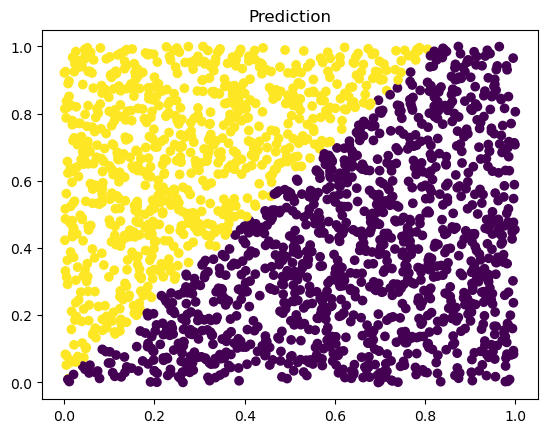

In [4]:
y_hat = np.sign(x_train@W_op)
y_hat = y_hat.reshape((2000,1))
# print(y_hat)
plt.scatter(x_train[:,0],x_train[:,1], c=y_hat[:,0])
plt.title('Prediction')
plt.show()

In [5]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_train))]
print('Errors: '+ str(sum(error_vec)))
print('Error Rate:' + str(sum(error_vec)*100/n_train) + '%')

Errors: 228
Error Rate:11.4%


#### e) Train a classiﬁer using the squared error loss, and plot the decision boundary. How does this compare with a decision boundary when trained with logistic loss?

While both squared error and logistic loss yield classifiers with comparable error rates, the weights derived from each method differ.

In [6]:
def squared_error_graddescent(X,y,tau,w_init,it):
    W = np.zeros((w_init.shape[0], it+1))
    W[:, [0]] = w_init
    Z = np.zeros((w_init.shape[0], it+1))
    for k in range (it):
        Z[:, [k]] = W[:, [k]] - tau * ((X.T @ (X @ W[:, [k]] - y)))
        W[:, [k+1]] = 1/(1+tau) * Z[:, [k]]
    return W

In [7]:
w_init = np.array([[1],[1]])
it = 200
tau = .0005
W = squared_error_graddescent(x_train,y_train,tau,w_init,it)
W_op = W[:,-1]
W_op

array([-1.98438138,  1.69197551])

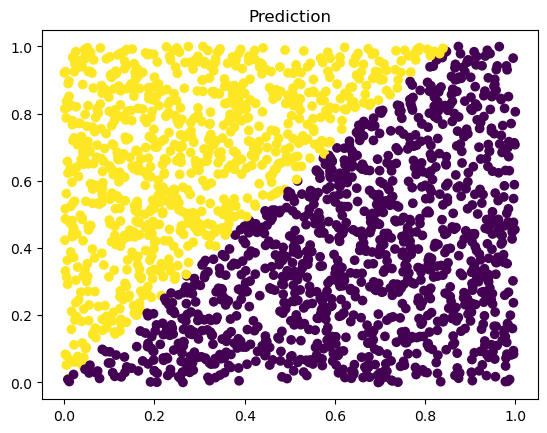

In [8]:
y_hat = np.sign(x_train@W_op)
y_hat = y_hat.reshape((2000,1))
# print(y_hat)
plt.scatter(x_train[:,0],x_train[:,1], c=y_hat[:,0])
plt.title('Prediction')
plt.show()

In [9]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_train))]
print('Errors: '+ str(sum(error_vec)))
print('Error Rate:' + str(sum(error_vec)*100/n_train) + '%')

Errors: 229
Error Rate:11.45%


#### f) Add 1000 easy to classify data points to the training set: more speciﬁcally, 1000 points with yi = −1 and x = [10, 0]T . Re-train your classiﬁers and comment on the performance when trained with the logistic loss and the squared error.

The classifier trained with logistic loss improved, showing a reduced error rate of 7.5%, down from approximately 11.4% with the original 2000 data points. Conversely, the classifier using squared error loss experienced a substantial increase in error rate to 74.3%.

In [10]:
new_x = np.array([[10, 0]] * 1000)
new_y = np.array([-1] * 1000).reshape(-1, 1)

x_train = np.vstack((x_train, new_x)) 
y_train = np.concatenate((y_train, new_y))
n_train = np.size(y_train)
print("New x_train shape:", x_train.shape)
print("New y_train shape:", y_train.shape)

New x_train shape: (3000, 2)
New y_train shape: (3000, 1)


In [11]:
w_init = np.array([[1],[1]])
it = 200
tau = .0005
W = logistic_graddescent(x_train,y_train,tau,w_init,it)
W_op = W[:,-1]
W_op

array([-5.96611322,  4.96768549])

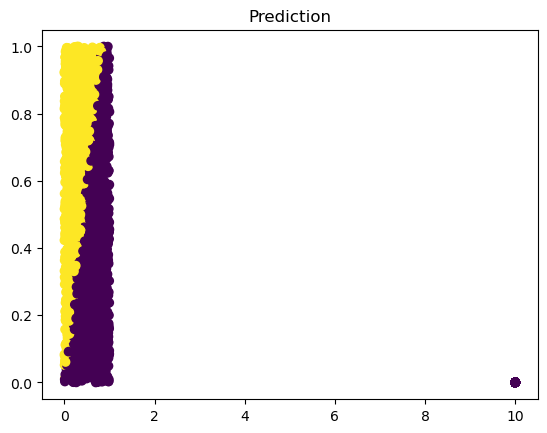

Errors: 226
Error Rate:7.533333333333333%


In [12]:
y_hat = np.sign(x_train@W_op)
y_hat = y_hat.reshape((3000,1))
# print(y_hat)
plt.scatter(x_train[:,0],x_train[:,1], c=y_hat[:,0])
plt.title('Prediction')
plt.show()
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_train))]
print('Errors: '+ str(sum(error_vec)))
print('Error Rate:' + str(sum(error_vec)*100/n_train) + '%')

In [13]:
w_init = np.array([[1],[1]])
it = 150
tau = .0005
W = squared_error_graddescent(x_train,y_train,tau,w_init,it)
W_op = W[:,-1]
W_op

array([9.43776652e+253, 4.59094739e+251])

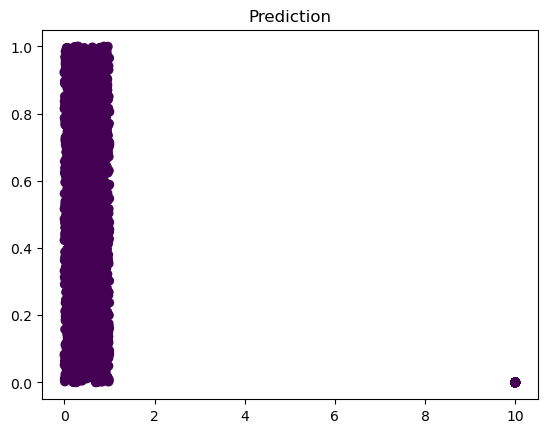

Errors: 2230
Error Rate:74.33333333333333%


In [14]:
y_hat = np.sign(x_train@W_op)
y_hat = y_hat.reshape((3000,1))
# print(y_hat)
plt.scatter(x_train[:,0],x_train[:,1], c=y_hat[:,0])
plt.title('Prediction')
plt.show()
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_train))]
print('Errors: '+ str(sum(error_vec)))
print('Error Rate:' + str(sum(error_vec)*100/n_train) + '%')